# <center>Análisis Descriptivo de la Temporada 21-22</center>

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import friedmanchisquare, wilcoxon
from scipy.stats import kruskal
import statsmodels.stats.multicomp as mc
from scipy import stats

### Cargamos los datos de la temporada 21-22 de la Premier League (Inglaterra):

In [2]:
#Cargamos el fichero
data_PremierLeague_2122 = pd.read_excel("../datasets/Premier League.xlsx", sheet_name = "2122")

In [3]:
#Imprimimos las primeras las primeras filas para comprobar
#data_PremierLeague_2122.head()

### Cargamos los datos de la temporada 21-22 de la La Liga (España):

In [4]:
#Cargamos el fichero
data_LaLiga_2122 = pd.read_excel("../datasets/La Liga.xlsx", sheet_name = "2122")

In [5]:
#Imprimimos las primeras las primeras filas para comprobar
#data_LaLiga_2122.head()

### Cargamos los datos de la temporada 21-22 de la Serie A (Italia):

In [6]:
#Cargamos el fichero
data_SerieA_2122 = pd.read_excel("../datasets/Serie A.xlsx", sheet_name = "2122")

In [7]:
#Imprimimos las primeras las primeras filas para comprobar
#data_SerieA_2122.head()

### Cargamos los datos de la temporada 21-22 de la Ligue 1 (Francesa):

In [8]:
#Cargamos el fichero
data_Ligue1_2122 = pd.read_excel("../datasets/Ligue 1.xlsx", sheet_name = "2122")

In [9]:
#Imprimimos las primeras las primeras filas para comprobar
#data_Ligue1_2122.head()

### Cargamos los datos de la temporada 21-22 de la Bundesliga (Alemania):

In [10]:
#Cargamos el fichero
data_Bundesliga_2122 = pd.read_excel("../datasets/Bundesliga.xlsx", sheet_name = "2122")

In [11]:
#Imprimimos las primeras las primeras filas para comprobar
#data_Bundesliga_2122.head()

# <center>Separación en 4 grupos</center>
* Las ligas: **Premier League**, **La Liga**, **Ligue 1** y **Serie A** tiene 20 equipos por temporada. Para estas ligas vamos a separar los equipos en los siguientes grupos según la posición en la que quedaron al finalizar la temprtada (columna **Rk**):
    + *Grupo 1* -> {1 - 5}
    + *Grupo 2* -> {6 - 10}
    + *Grupo 3* -> {11 - 15}
    + *Grupo 4* -> {16 - 20}


* A diferencia del resto, la **Bundesliga** tiene 18 equipos por temporada. Para esta liga realizaremos la siguiete separación:
    + *Grupo 1* -> {1 - 4}
    + *Grupo 2* -> {5 - 9}
    + *Grupo 3* -> {10 - 14}
    + *Grupo 4* -> {15 - 18}
    

Para realizar la separación crearemos una nueva columa a la que llamaremos ***Group*** y podrá tener los valores { "1", "2", "3", "4" }

### Para la Premier:

In [12]:
data_PremierLeague_2122["Group"] = "1"
data_PremierLeague_2122.loc[((data_PremierLeague_2122['Rk'] > 5) & (data_PremierLeague_2122['Rk'] < 11)), 'Group'] = "2"
data_PremierLeague_2122.loc[((data_PremierLeague_2122['Rk'] > 10) & (data_PremierLeague_2122['Rk'] < 16)), 'Group'] = "3"
data_PremierLeague_2122.loc[((data_PremierLeague_2122['Rk'] > 15) & (data_PremierLeague_2122['Rk'] < 21)), 'Group'] = "4"

# Para imprimir solo las columnas "Rk", "Squad" y "Group" para comprobar:
# print(data_PremierLeague_2122[['Rk', 'Squad', 'Group']])

### Para la La Liga:

In [13]:
data_LaLiga_2122["Group"] = "1"
data_LaLiga_2122.loc[((data_LaLiga_2122['Rk'] > 5) & (data_LaLiga_2122['Rk'] < 11)), 'Group'] = "2"
data_LaLiga_2122.loc[((data_LaLiga_2122['Rk'] > 10) & (data_LaLiga_2122['Rk'] < 16)), 'Group'] = "3"
data_LaLiga_2122.loc[((data_LaLiga_2122['Rk'] > 15) & (data_LaLiga_2122['Rk'] < 21)), 'Group'] = "4"

# Para imprimir solo las columnas "Rk", "Squad" y "Group" para comprobar:
# print(data_LaLiga_2122[['Rk', 'Squad', 'Group']])

### Para la Serie A:

In [14]:
data_SerieA_2122["Group"] = "1"
data_SerieA_2122.loc[((data_SerieA_2122['Rk'] > 5) & (data_SerieA_2122['Rk'] < 11)), 'Group'] = "2"
data_SerieA_2122.loc[((data_SerieA_2122['Rk'] > 10) & (data_SerieA_2122['Rk'] < 16)), 'Group'] = "3"
data_SerieA_2122.loc[((data_SerieA_2122['Rk'] > 15) & (data_SerieA_2122['Rk'] < 21)), 'Group'] = "4"

# Para imprimir solo las columnas "Rk", "Squad" y "Group" para comprobar:
# print(data_SerieA_2122[['Rk', 'Squad', 'Group']])

### Para la Ligue 1:

In [15]:
data_Ligue1_2122["Group"] = "1"
data_Ligue1_2122.loc[((data_Ligue1_2122['Rk'] > 5) & (data_Ligue1_2122['Rk'] < 11)), 'Group'] = "2"
data_Ligue1_2122.loc[((data_Ligue1_2122['Rk'] > 10) & (data_Ligue1_2122['Rk'] < 16)), 'Group'] = "3"
data_Ligue1_2122.loc[((data_Ligue1_2122['Rk'] > 15) & (data_Ligue1_2122['Rk'] < 21)), 'Group'] = "4"

# Para imprimir solo las columnas "Rk", "Squad" y "Group" para comprobar:
# print(data_Ligue1_2122[['Rk', 'Squad', 'Group']])

### Para la Bundesliga:

In [16]:
data_Bundesliga_2122["Group"] = "1"
data_Bundesliga_2122.loc[((data_Bundesliga_2122['Rk'] > 4) & (data_Bundesliga_2122['Rk'] < 10)), 'Group'] = "2"
data_Bundesliga_2122.loc[((data_Bundesliga_2122['Rk'] > 9) & (data_Bundesliga_2122['Rk'] < 15)), 'Group'] = "3"
data_Bundesliga_2122.loc[((data_Bundesliga_2122['Rk'] > 14) & (data_Bundesliga_2122['Rk'] < 19)), 'Group'] = "4"

# Para imprimir solo las columnas "Rk", "Squad" y "Group" para comprobar:
# print(data_Bundesliga_2122[['Rk', 'Squad', 'Group']])

# <center>Boxplots</center>

### Creo dos funciones para reducir el código

In [17]:
#Para la Premier:
def generador_de_tablas_grupos_premier(a, b):
    df_PL = data_PremierLeague_2122[[a, b]]
    df_PLG1 = df_PL[df_PL[a] == "1"][b]
    df_PLG2 = df_PL[df_PL[a] == "2"][b]
    df_PLG3 = df_PL[df_PL[a] == "3"][b]
    df_PLG4 = df_PL[df_PL[a] == "4"][b]
    return df_PLG1, df_PLG2, df_PLG3, df_PLG4

#Para la La Liga:
def generador_de_tablas_grupos_laliga(a, b):
    df_LL = data_LaLiga_2122[[a, b]]
    df_LLG1 = df_LL[df_LL[a] == "1"][b]
    df_LLG2 = df_LL[df_LL[a] == "2"][b]
    df_LLG3 = df_LL[df_LL[a] == "3"][b]
    df_LLG4 = df_LL[df_LL[a] == "4"][b]
    return df_LLG1, df_LLG2, df_LLG3, df_LLG4

#Para la Serie A:
def generador_de_tablas_grupos_seriea(a, b):
    df_SA = data_SerieA_2122[[a, b]]
    df_SAG1 = df_SA[df_SA[a] == "1"][b]
    df_SAG2 = df_SA[df_SA[a] == "2"][b]
    df_SAG3 = df_SA[df_SA[a] == "3"][b]
    df_SAG4 = df_SA[df_SA[a] == "4"][b]
    return df_SAG1, df_SAG2, df_SAG3, df_SAG4

#Para la Ligue 1:
def generador_de_tablas_grupos_ligue1(a, b):
    df_L1 = data_Ligue1_2122[[a, b]]
    df_L1G1 = df_L1[df_L1[a] == "1"][b]
    df_L1G2 = df_L1[df_L1[a] == "2"][b]
    df_L1G3 = df_L1[df_L1[a] == "3"][b]
    df_L1G4 = df_L1[df_L1[a] == "4"][b]
    return df_L1G1, df_L1G2, df_L1G3, df_L1G4

#Para la Bundesliga:
def generador_de_tablas_grupos_bundesliga(a, b):
    df_BL = data_Bundesliga_2122[[a, b]]
    df_BLG1 = df_BL[df_BL[a] == "1"][b]
    df_BLG2 = df_BL[df_BL[a] == "2"][b]
    df_BLG3 = df_BL[df_BL[a] == "3"][b]
    df_BLG4 = df_BL[df_BL[a] == "4"][b]
    return df_BLG1, df_BLG2, df_BLG3, df_BLG4

In [18]:
def crear_boxplot_grupos(titulo, variable, L_PL, L_LL, L_SA, L_L1, L_BL):
    labels = ['G1', 'G2', 'G3', 'G4']
    fs = 12
    fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(14, 3), sharey=True)
    fig.suptitle(t = titulo, verticalalignment = "bottom", fontsize = 16, fontweight = 550)

    #Para la Premier:
    axs[0].boxplot([L_PL[0], L_PL[1], L_PL[2], L_PL[3]], labels = labels)
    axs[0].set_title('Premier League', fontsize=fs)

    #Para la La Liga:
    axs[1].boxplot([L_LL[0], L_LL[1], L_LL[2], L_LL[3]], labels = labels)
    axs[1].set_title('La Liga', fontsize=fs)

    #Para la Serie A:
    axs[2].boxplot([L_SA[0], L_SA[1], L_SA[2], L_SA[3]], labels = labels)
    axs[2].set_title('Serie A', fontsize=fs)

    #Para la Ligue 1:
    axs[3].boxplot([L_L1[0], L_L1[1], L_L1[2], L_L1[3]], labels = labels)
    axs[3].set_title('Ligue 1', fontsize=fs)

    #Para la Bundesliga:
    axs[4].boxplot([L_BL[0], L_BL[1], L_BL[2], L_BL[3]], labels = labels)
    axs[4].set_title('Bundesliga', fontsize=fs)
    
    #Para las cinco ligas:
    labels2 = ['PL', 'LL', 'SA', 'L1', 'BL']
    axs[5].boxplot([data_PremierLeague_2122[variable], data_LaLiga_2122[variable], data_SerieA_2122[variable], data_Ligue1_2122[variable], data_Bundesliga_2122[variable]], labels = labels2)
    axs[5].set_title('Cinco ligas', fontsize=fs)
    
    
    return None

## <center>Comaparación de GoalsFavor

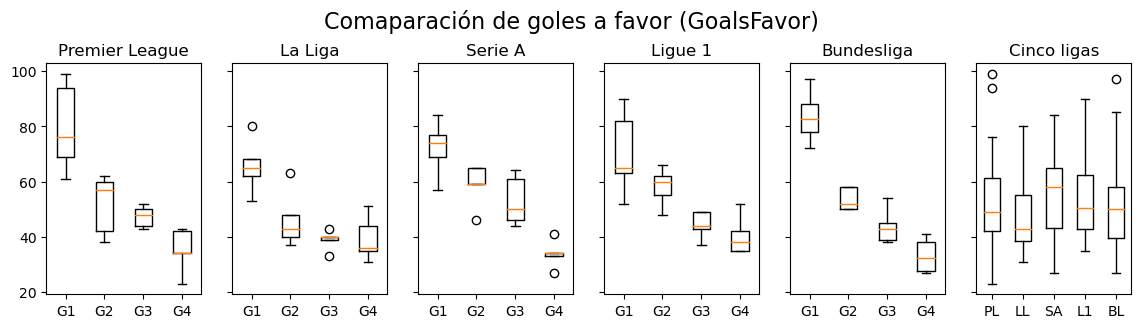

In [19]:
a = "Group"
b = "GoalsFavor"
L_PL = generador_de_tablas_grupos_premier(a, b)
L_LL = generador_de_tablas_grupos_laliga(a, b)
L_SA = generador_de_tablas_grupos_seriea(a, b)
L_L1 = generador_de_tablas_grupos_ligue1(a, b)
L_BL = generador_de_tablas_grupos_bundesliga(a, b)

variable = "GoalsFavor"
titulo = 'Comaparación de goles a favor (GoalsFavor)'
crear_boxplot_grupos(titulo, variable, L_PL, L_LL, L_SA, L_L1, L_BL)

### <center>Test de Shapiro-Wilk</center>

In [20]:
columna_concreta = pd.concat([data_PremierLeague_2122["GoalsFavor"], data_LaLiga_2122["GoalsFavor"], data_SerieA_2122["GoalsFavor"], data_Ligue1_2122["GoalsFavor"], data_Bundesliga_2122["GoalsFavor"]])

In [21]:
shapiro_test = stats.shapiro(columna_concreta)
shapiro_test

ShapiroResult(statistic=0.9489926695823669, pvalue=0.0008200344163924456)

#### Entre los grupos de la Premier League:

In [22]:
# Creación de los 4 vectores nuevos
group1 = []
group2 = []
group3 = []
group4 = []

# Iteración sobre las mediciones y categorías correspondientes
for i in range(len(data_PremierLeague_2122["GoalsFavor"])):
    if data_PremierLeague_2122["Group"][i] == '1':
        group1.append(data_PremierLeague_2122["GoalsFavor"][i])
    elif data_PremierLeague_2122["Group"][i] == '2':
        group2.append(data_PremierLeague_2122["GoalsFavor"][i])
    elif data_PremierLeague_2122["Group"][i] == '3':
        group3.append(data_PremierLeague_2122["GoalsFavor"][i])
    elif data_PremierLeague_2122["Group"][i] == '4':
        group4.append(data_PremierLeague_2122["GoalsFavor"][i])

### <center>Test de Kruskal-Wallis
* La hipótesis nula (H0): La media de los cuatro grupos es igual.

* La hipótesis alternativa: (Ha): Almenos un grupo es diferente del resto.

In [23]:
kruskal(group1, group2, group3, group4)

KruskalResult(statistic=14.108967596081376, pvalue=0.002760519470963145)

### <center>Prueba de Tukey

In [24]:
# Juntar los datos en una sola lista
data = group1 + group2 + group3 + group4

# Crear una lista de etiquetas para los grupos
labels = ['group1'] * len(group1) + ['group2'] * len(group2) + ['group3'] * len(group3) + ['group4'] * len(group4)

# Crear un dataframe con los datos y las etiquetas
df = pd.DataFrame({'data': data, 'labels': labels})

# Realizar el test de Tukey
tukey_results = mc.pairwise_tukeyhsd(df['data'], df['labels'])

# Imprimir los resultados
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
group1 group2    -28.0 0.0041 -47.497  -8.503   True
group1 group3    -32.4 0.0011 -51.897 -12.903   True
group1 group4    -44.6    0.0 -64.097 -25.103   True
group2 group3     -4.4 0.9155 -23.897  15.097  False
group2 group4    -16.6   0.11 -36.097   2.897  False
group3 group4    -12.2 0.3135 -31.697   7.297  False
----------------------------------------------------


#### Entre los grupos de la La Liga:

In [25]:
# Creación de los 4 vectores nuevos
group1 = []
group2 = []
group3 = []
group4 = []

# Iteración sobre las mediciones y categorías correspondientes
for i in range(len(data_LaLiga_2122["GoalsFavor"])):
    if data_LaLiga_2122["Group"][i] == '1':
        group1.append(data_LaLiga_2122["GoalsFavor"][i])
    elif data_LaLiga_2122["Group"][i] == '2':
        group2.append(data_LaLiga_2122["GoalsFavor"][i])
    elif data_LaLiga_2122["Group"][i] == '3':
        group3.append(data_LaLiga_2122["GoalsFavor"][i])
    elif data_LaLiga_2122["Group"][i] == '4':
        group4.append(data_LaLiga_2122["GoalsFavor"][i])

### <center>Test de Kruskal-Wallis
* La hipótesis nula (H0): La media de los cuatro grupos es igual.

* La hipótesis alternativa: (Ha): Almenos un grupo es diferente del resto.

In [26]:
kruskal(group1, group2, group3, group4)

KruskalResult(statistic=11.055849056603765, pvalue=0.011427680239600523)

### <center>Prueba de Tukey

In [27]:
# Juntar los datos en una sola lista
data = group1 + group2 + group3 + group4

# Crear una lista de etiquetas para los grupos
labels = ['group1'] * len(group1) + ['group2'] * len(group2) + ['group3'] * len(group3) + ['group4'] * len(group4)

# Crear un dataframe con los datos y las etiquetas
df = pd.DataFrame({'data': data, 'labels': labels})

# Realizar el test de Tukey
tukey_results = mc.pairwise_tukeyhsd(df['data'], df['labels'])

# Imprimir los resultados
print(tukey_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
group1 group2    -19.4 0.0099 -34.5066  -4.2934   True
group1 group3    -26.6 0.0006 -41.7066 -11.4934   True
group1 group4    -26.2 0.0007 -41.3066 -11.0934   True
group2 group3     -7.2 0.5384 -22.3066   7.9066  False
group2 group4     -6.8 0.5832 -21.9066   8.3066  False
group3 group4      0.4 0.9998 -14.7066  15.5066  False
------------------------------------------------------


#### Entre los grupos de la Serie A:

In [28]:
# Creación de los 4 vectores nuevos
group1 = []
group2 = []
group3 = []
group4 = []

# Iteración sobre las mediciones y categorías correspondientes
for i in range(len(data_SerieA_2122["GoalsFavor"])):
    if data_SerieA_2122["Group"][i] == '1':
        group1.append(data_SerieA_2122["GoalsFavor"][i])
    elif data_SerieA_2122["Group"][i] == '2':
        group2.append(data_SerieA_2122["GoalsFavor"][i])
    elif data_SerieA_2122["Group"][i] == '3':
        group3.append(data_SerieA_2122["GoalsFavor"][i])
    elif data_SerieA_2122["Group"][i] == '4':
        group4.append(data_SerieA_2122["GoalsFavor"][i])

### <center>Test de Kruskal-Wallis
* La hipótesis nula (H0): La media de los cuatro grupos es igual.

* La hipótesis alternativa: (Ha): Almenos un grupo es diferente del resto.

In [29]:
kruskal(group1, group2, group3, group4)

KruskalResult(statistic=14.262895927601809, pvalue=0.0025682930151479325)

### <center>Prueba de Tukey

In [30]:
# Juntar los datos en una sola lista
data = group1 + group2 + group3 + group4

# Crear una lista de etiquetas para los grupos
labels = ['group1'] * len(group1) + ['group2'] * len(group2) + ['group3'] * len(group3) + ['group4'] * len(group4)

# Crear un dataframe con los datos y las etiquetas
df = pd.DataFrame({'data': data, 'labels': labels})

# Realizar el test de Tukey
tukey_results = mc.pairwise_tukeyhsd(df['data'], df['labels'])

# Imprimir los resultados
print(tukey_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
group1 group2    -13.4 0.0832 -28.2001   1.4001  False
group1 group3    -19.2 0.0092 -34.0001  -4.3999   True
group1 group4    -38.4    0.0 -53.2001 -23.5999   True
group2 group3     -5.8 0.6822 -20.6001   9.0001  False
group2 group4    -25.0  0.001 -39.8001 -10.1999   True
group3 group4    -19.2 0.0092 -34.0001  -4.3999   True
------------------------------------------------------


#### Entre los grupos de la Ligue 1:

In [31]:
# Creación de los 4 vectores nuevos
group1 = []
group2 = []
group3 = []
group4 = []

# Iteración sobre las mediciones y categorías correspondientes
for i in range(len(data_Ligue1_2122["GoalsFavor"])):
    if data_Ligue1_2122["Group"][i] == '1':
        group1.append(data_Ligue1_2122["GoalsFavor"][i])
    elif data_Ligue1_2122["Group"][i] == '2':
        group2.append(data_Ligue1_2122["GoalsFavor"][i])
    elif data_Ligue1_2122["Group"][i] == '3':
        group3.append(data_Ligue1_2122["GoalsFavor"][i])
    elif data_Ligue1_2122["Group"][i] == '4':
        group4.append(data_Ligue1_2122["GoalsFavor"][i])

### <center>Test de Kruskal-Wallis
* La hipótesis nula (H0): La media de los cuatro grupos es igual.

* La hipótesis alternativa: (Ha): Almenos un grupo es diferente del resto.

In [32]:
kruskal(group1, group2, group3, group4)

KruskalResult(statistic=13.450339110776175, pvalue=0.003757351242755967)

### <center>Prueba de Tukey

In [33]:
# Juntar los datos en una sola lista
data = group1 + group2 + group3 + group4

# Crear una lista de etiquetas para los grupos
labels = ['group1'] * len(group1) + ['group2'] * len(group2) + ['group3'] * len(group3) + ['group4'] * len(group4)

# Crear un dataframe con los datos y las etiquetas
df = pd.DataFrame({'data': data, 'labels': labels})

# Realizar el test de Tukey
tukey_results = mc.pairwise_tukeyhsd(df['data'], df['labels'])

# Imprimir los resultados
print(tukey_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
group1 group2    -12.2 0.2158 -29.3327   4.9327  False
group1 group3    -26.0 0.0026 -43.1327  -8.8673   True
group1 group4    -30.0 0.0007 -47.1327 -12.8673   True
group2 group3    -13.8 0.1385 -30.9327   3.3327  False
group2 group4    -17.8 0.0403 -34.9327  -0.6673   True
group3 group4     -4.0 0.9076 -21.1327  13.1327  False
------------------------------------------------------


#### Entre los grupos de la Bundesliga:

In [34]:
# Creación de los 4 vectores nuevos
group1 = []
group2 = []
group3 = []
group4 = []

# Iteración sobre las mediciones y categorías correspondientes
for i in range(len(data_Bundesliga_2122["GoalsFavor"])):
    if data_Bundesliga_2122["Group"][i] == '1':
        group1.append(data_Bundesliga_2122["GoalsFavor"][i])
    elif data_Bundesliga_2122["Group"][i] == '2':
        group2.append(data_Bundesliga_2122["GoalsFavor"][i])
    elif data_Bundesliga_2122["Group"][i] == '3':
        group3.append(data_Bundesliga_2122["GoalsFavor"][i])
    elif data_Bundesliga_2122["Group"][i] == '4':
        group4.append(data_Bundesliga_2122["GoalsFavor"][i])

### <center>Test de Kruskal-Wallis
* La hipótesis nula (H0): La media de los cuatro grupos es igual.

* La hipótesis alternativa: (Ha): Almenos un grupo es diferente del resto.

In [35]:
kruskal(group1, group2, group3, group4)

KruskalResult(statistic=14.398138572905891, pvalue=0.0024103890031101243)

### <center>Prueba de Tukey

In [36]:
# Juntar los datos en una sola lista
data = group1 + group2 + group3 + group4

# Crear una lista de etiquetas para los grupos
labels = ['group1'] * len(group1) + ['group2'] * len(group2) + ['group3'] * len(group3) + ['group4'] * len(group4)

# Crear un dataframe con los datos y las etiquetas
df = pd.DataFrame({'data': data, 'labels': labels})

# Realizar el test de Tukey
tukey_results = mc.pairwise_tukeyhsd(df['data'], df['labels'])

# Imprimir los resultados
print(tukey_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
group1 group2    -29.9 0.0001 -43.6846 -16.1154   True
group1 group3    -39.7    0.0 -53.4846 -25.9154   True
group1 group4   -50.25    0.0 -64.7802 -35.7198   True
group2 group3     -9.8 0.1734 -22.7962   3.1962  False
group2 group4   -20.35 0.0037 -34.1346  -6.5654   True
group3 group4   -10.55 0.1644 -24.3346   3.2346  False
------------------------------------------------------


#### Entre las 4 ligas que tienen la misma cantidad de equipos:

### <center>Test de Kruskal-Wallis
* La hipótesis nula (H0): La media de los cuatro grupos es igual.

* La hipótesis alternativa: (Ha): Almenos un grupo es diferente del resto.

In [37]:
kruskal(data_PremierLeague_2122["GoalsFavor"], data_LaLiga_2122["GoalsFavor"], data_SerieA_2122["GoalsFavor"], data_Ligue1_2122["GoalsFavor"])

KruskalResult(statistic=2.56921005701953, pvalue=0.4629130078601459)

## <center>Comaparación de ShotsOnTarget

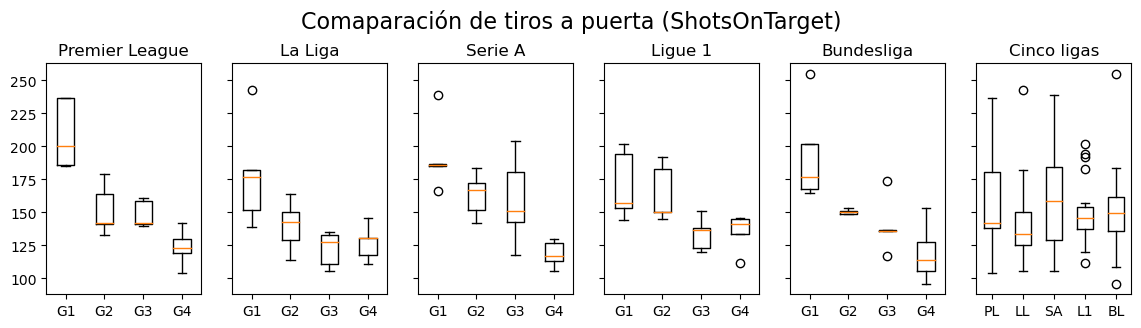

In [38]:
a = "Group"
b = "ShotsOnTarget"
L_PL = generador_de_tablas_grupos_premier(a, b)
L_LL = generador_de_tablas_grupos_laliga(a, b)
L_SA = generador_de_tablas_grupos_seriea(a, b)
L_L1 = generador_de_tablas_grupos_ligue1(a, b)
L_BL = generador_de_tablas_grupos_bundesliga(a, b)

titulo = 'Comaparación de tiros a puerta (ShotsOnTarget)'
variable = "ShotsOnTarget"
crear_boxplot_grupos(titulo, variable, L_PL, L_LL, L_SA, L_L1, L_BL)

### <center>Test de Shapiro-Wilk</center>

In [39]:
columna_concreta = pd.concat([data_PremierLeague_2122["ShotsOnTarget"], data_LaLiga_2122["ShotsOnTarget"], data_SerieA_2122["ShotsOnTarget"], data_Ligue1_2122["ShotsOnTarget"], data_Bundesliga_2122["ShotsOnTarget"]])

In [40]:
shapiro_test = stats.shapiro(columna_concreta)
shapiro_test

ShapiroResult(statistic=0.9307587146759033, pvalue=6.513956031994894e-05)

#### Entre los grupos de la Premier League:

In [41]:
# Creación de los 4 vectores nuevos
group1 = []
group2 = []
group3 = []
group4 = []

# Iteración sobre las mediciones y categorías correspondientes
for i in range(len(data_PremierLeague_2122["ShotsOnTarget"])):
    if data_PremierLeague_2122["Group"][i] == '1':
        group1.append(data_PremierLeague_2122["ShotsOnTarget"][i])
    elif data_PremierLeague_2122["Group"][i] == '2':
        group2.append(data_PremierLeague_2122["ShotsOnTarget"][i])
    elif data_PremierLeague_2122["Group"][i] == '3':
        group3.append(data_PremierLeague_2122["ShotsOnTarget"][i])
    elif data_PremierLeague_2122["Group"][i] == '4':
        group4.append(data_PremierLeague_2122["ShotsOnTarget"][i])

### <center>Test de Kruskal-Wallis
* La hipótesis nula (H0): La media de los cuatro grupos es igual.

* La hipótesis alternativa: (Ha): Almenos un grupo es diferente del resto.

In [42]:
kruskal(group1, group2, group3, group4)

KruskalResult(statistic=14.232779456193336, pvalue=0.002604828383854986)

### <center>Prueba de Tukey

In [43]:
# Juntar los datos en una sola lista
data = group1 + group2 + group3 + group4

# Crear una lista de etiquetas para los grupos
labels = ['group1'] * len(group1) + ['group2'] * len(group2) + ['group3'] * len(group3) + ['group4'] * len(group4)

# Crear un dataframe con los datos y las etiquetas
df = pd.DataFrame({'data': data, 'labels': labels})

# Realizar el test de Tukey
tukey_results = mc.pairwise_tukeyhsd(df['data'], df['labels'])

# Imprimir los resultados
print(tukey_results)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
group1 group2    -57.2 0.0008  -90.5379 -23.8621   True
group1 group3    -60.4 0.0005  -93.7379 -27.0621   True
group1 group4    -85.4    0.0 -118.7379 -52.0621   True
group2 group3     -3.2 0.9925  -36.5379  30.1379  False
group2 group4    -28.2 0.1131  -61.5379   5.1379  False
group3 group4    -25.0 0.1811  -58.3379   8.3379  False
-------------------------------------------------------


#### Entre los grupos de la La Liga:

In [44]:
# Creación de los 4 vectores nuevos
group1 = []
group2 = []
group3 = []
group4 = []

# Iteración sobre las mediciones y categorías correspondientes
for i in range(len(data_LaLiga_2122["ShotsOnTarget"])):
    if data_LaLiga_2122["Group"][i] == '1':
        group1.append(data_LaLiga_2122["ShotsOnTarget"][i])
    elif data_LaLiga_2122["Group"][i] == '2':
        group2.append(data_LaLiga_2122["ShotsOnTarget"][i])
    elif data_LaLiga_2122["Group"][i] == '3':
        group3.append(data_LaLiga_2122["ShotsOnTarget"][i])
    elif data_LaLiga_2122["Group"][i] == '4':
        group4.append(data_LaLiga_2122["ShotsOnTarget"][i])

### <center>Test de Kruskal-Wallis
* La hipótesis nula (H0): La media de los cuatro grupos es igual.

* La hipótesis alternativa: (Ha): Almenos un grupo es diferente del resto.

In [45]:
kruskal(group1, group2, group3, group4)

KruskalResult(statistic=10.006475903614444, pvalue=0.018511168040898418)

### <center>Prueba de Tukey

In [46]:
# Juntar los datos en una sola lista
data = group1 + group2 + group3 + group4

# Crear una lista de etiquetas para los grupos
labels = ['group1'] * len(group1) + ['group2'] * len(group2) + ['group3'] * len(group3) + ['group4'] * len(group4)

# Crear un dataframe con los datos y las etiquetas
df = pd.DataFrame({'data': data, 'labels': labels})

# Realizar el test de Tukey
tukey_results = mc.pairwise_tukeyhsd(df['data'], df['labels'])

# Imprimir los resultados
print(tukey_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
group1 group2    -38.6 0.0937 -82.3409   5.1409  False
group1 group3    -56.0 0.0102 -99.7409 -12.2591   True
group1 group4    -51.2 0.0192 -94.9409  -7.4591   True
group2 group3    -17.4 0.6723 -61.1409  26.3409  False
group2 group4    -12.6 0.8422 -56.3409  31.1409  False
group3 group4      4.8 0.9889 -38.9409  48.5409  False
------------------------------------------------------


#### Entre los grupos de la SerieA:

In [47]:
# Creación de los 4 vectores nuevos
group1 = []
group2 = []
group3 = []
group4 = []

# Iteración sobre las mediciones y categorías correspondientes
for i in range(len(data_SerieA_2122["ShotsOnTarget"])):
    if data_SerieA_2122["Group"][i] == '1':
        group1.append(data_SerieA_2122["ShotsOnTarget"][i])
    elif data_SerieA_2122["Group"][i] == '2':
        group2.append(data_SerieA_2122["ShotsOnTarget"][i])
    elif data_SerieA_2122["Group"][i] == '3':
        group3.append(data_SerieA_2122["ShotsOnTarget"][i])
    elif data_SerieA_2122["Group"][i] == '4':
        group4.append(data_SerieA_2122["ShotsOnTarget"][i])

### <center>Test de Kruskal-Wallis
* La hipótesis nula (H0): La media de los cuatro grupos es igual.

* La hipótesis alternativa: (Ha): Almenos un grupo es diferente del resto.

In [48]:
kruskal(group1, group2, group3, group4)

KruskalResult(statistic=12.30285714285715, pvalue=0.0064145344575662205)

### <center>Prueba de Tukey

In [49]:
# Juntar los datos en una sola lista
data = group1 + group2 + group3 + group4

# Crear una lista de etiquetas para los grupos
labels = ['group1'] * len(group1) + ['group2'] * len(group2) + ['group3'] * len(group3) + ['group4'] * len(group4)

# Crear un dataframe con los datos y las etiquetas
df = pd.DataFrame({'data': data, 'labels': labels})

# Realizar el test de Tukey
tukey_results = mc.pairwise_tukeyhsd(df['data'], df['labels'])

# Imprimir los resultados
print(tukey_results)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
group1 group2    -29.2 0.2484  -72.1029  13.7029  False
group1 group3    -33.2 0.1616  -76.1029   9.7029  False
group1 group4    -74.0 0.0008 -116.9029 -31.0971   True
group2 group3     -4.0 0.9931  -46.9029  38.9029  False
group2 group4    -44.8 0.0392  -87.7029  -1.8971   True
group3 group4    -40.8 0.0653  -83.7029   2.1029  False
-------------------------------------------------------


#### Entre los grupos de la Ligue 1:

In [50]:
# Creación de los 4 vectores nuevos
group1 = []
group2 = []
group3 = []
group4 = []

# Iteración sobre las mediciones y categorías correspondientes
for i in range(len(data_Ligue1_2122["ShotsOnTarget"])):
    if data_Ligue1_2122["Group"][i] == '1':
        group1.append(data_Ligue1_2122["ShotsOnTarget"][i])
    elif data_Ligue1_2122["Group"][i] == '2':
        group2.append(data_Ligue1_2122["ShotsOnTarget"][i])
    elif data_Ligue1_2122["Group"][i] == '3':
        group3.append(data_Ligue1_2122["ShotsOnTarget"][i])
    elif data_Ligue1_2122["Group"][i] == '4':
        group4.append(data_Ligue1_2122["ShotsOnTarget"][i])

### <center>Test de Kruskal-Wallis
* La hipótesis nula (H0): La media de los cuatro grupos es igual.

* La hipótesis alternativa: (Ha): Almenos un grupo es diferente del resto.

In [51]:
kruskal(group1, group2, group3, group4)

KruskalResult(statistic=10.561596385542165, pvalue=0.014348822476835107)

### <center>Prueba de Tukey

In [52]:
# Juntar los datos en una sola lista
data = group1 + group2 + group3 + group4

# Crear una lista de etiquetas para los grupos
labels = ['group1'] * len(group1) + ['group2'] * len(group2) + ['group3'] * len(group3) + ['group4'] * len(group4)

# Crear un dataframe con los datos y las etiquetas
df = pd.DataFrame({'data': data, 'labels': labels})

# Realizar el test de Tukey
tukey_results = mc.pairwise_tukeyhsd(df['data'], df['labels'])

# Imprimir los resultados
print(tukey_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
group1 group2     -6.0 0.9607 -41.1801 29.1801  False
group1 group3    -36.2 0.0426 -71.3801 -1.0199   True
group1 group4    -34.4 0.0564 -69.5801  0.7801  False
group2 group3    -30.2 0.1061 -65.3801  4.9801  False
group2 group4    -28.4 0.1373 -63.5801  6.7801  False
group3 group4      1.8 0.9988 -33.3801 36.9801  False
-----------------------------------------------------


#### Entre los grupos de la Bundesliga:

In [53]:
# Creación de los 4 vectores nuevos
group1 = []
group2 = []
group3 = []
group4 = []

# Iteración sobre las mediciones y categorías correspondientes
for i in range(len(data_Bundesliga_2122["ShotsOnTarget"])):
    if data_Bundesliga_2122["Group"][i] == '1':
        group1.append(data_Bundesliga_2122["ShotsOnTarget"][i])
    elif data_Bundesliga_2122["Group"][i] == '2':
        group2.append(data_Bundesliga_2122["ShotsOnTarget"][i])
    elif data_Bundesliga_2122["Group"][i] == '3':
        group3.append(data_Bundesliga_2122["ShotsOnTarget"][i])
    elif data_Bundesliga_2122["Group"][i] == '4':
        group4.append(data_Bundesliga_2122["ShotsOnTarget"][i])

### <center>Test de Kruskal-Wallis
* La hipótesis nula (H0): La media de los cuatro grupos es igual.

* La hipótesis alternativa: (Ha): Almenos un grupo es diferente del resto.

In [54]:
kruskal(group1, group2, group3, group4)

KruskalResult(statistic=9.799197722567284, pvalue=0.020352460991052236)

### <center>Prueba de Tukey

In [55]:
# Juntar los datos en una sola lista
data = group1 + group2 + group3 + group4

# Crear una lista de etiquetas para los grupos
labels = ['group1'] * len(group1) + ['group2'] * len(group2) + ['group3'] * len(group3) + ['group4'] * len(group4)

# Crear un dataframe con los datos y las etiquetas
df = pd.DataFrame({'data': data, 'labels': labels})

# Realizar el test de Tukey
tukey_results = mc.pairwise_tukeyhsd(df['data'], df['labels'])

# Imprimir los resultados
print(tukey_results)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
group1 group2   -42.85 0.0953  -91.7523   6.0523  False
group1 group3   -53.25  0.031 -102.1523  -4.3477   True
group1 group4    -74.0 0.0046 -125.5475 -22.4525   True
group2 group3    -10.4 0.9118  -56.5055  35.7055  False
group2 group4   -31.15 0.2917  -80.0523  17.7523  False
group3 group4   -20.75 0.6171  -69.6523  28.1523  False
-------------------------------------------------------


#### Entre las 4 ligas que tienen la misma cantidad de equipos:

### <center>Test de Kruskal-Wallis
* La hipótesis nula (H0): La media de los cuatro grupos es igual.

* La hipótesis alternativa: (Ha): Almenos un grupo es diferente del resto.

In [56]:
kruskal(data_PremierLeague_2122["ShotsOnTarget"], data_LaLiga_2122["ShotsOnTarget"], data_SerieA_2122["ShotsOnTarget"], data_Ligue1_2122["ShotsOnTarget"])

KruskalResult(statistic=4.3546056797129635, pvalue=0.22563158500081296)

## <center>Comaparación de pases completados con éxito (PassesCompleted)

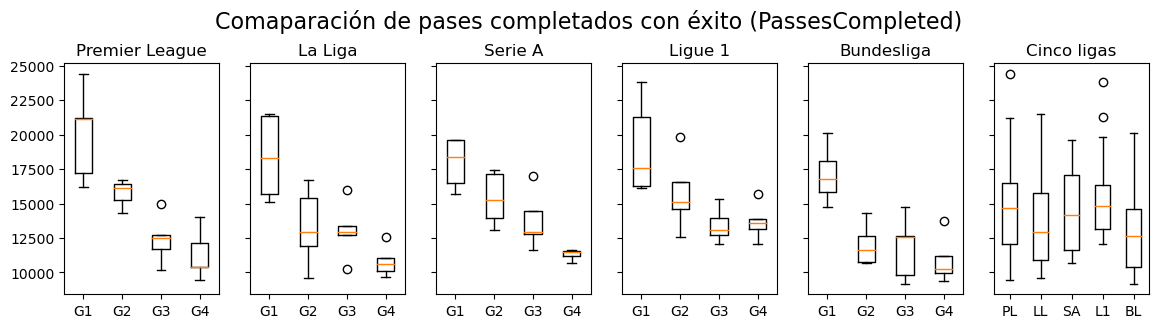

In [57]:
a = "Group"
b = "TotalPassesCompleted"
L_PL = generador_de_tablas_grupos_premier(a, b)
L_LL = generador_de_tablas_grupos_laliga(a, b)
L_SA = generador_de_tablas_grupos_seriea(a, b)
L_L1 = generador_de_tablas_grupos_ligue1(a, b)
L_BL = generador_de_tablas_grupos_bundesliga(a, b)

titulo = 'Comaparación de pases completados con éxito (PassesCompleted)'
variable = "TotalPassesCompleted"
crear_boxplot_grupos(titulo, variable, L_PL, L_LL, L_SA, L_L1, L_BL)

### <center>Test de Shapiro-Wilk</center>

In [58]:
columna_concreta = pd.concat([data_PremierLeague_2122["TotalPassesCompleted"], data_LaLiga_2122["TotalPassesCompleted"], data_SerieA_2122["TotalPassesCompleted"], data_Ligue1_2122["TotalPassesCompleted"], data_Bundesliga_2122["TotalPassesCompleted"]])

In [59]:
shapiro_test = stats.shapiro(columna_concreta)
shapiro_test

ShapiroResult(statistic=0.9494795203208923, pvalue=0.0008817019988782704)

#### Entre los grupos de la Premier League:

In [60]:
# Creación de los 4 vectores nuevos
group1 = []
group2 = []
group3 = []
group4 = []

# Iteración sobre las mediciones y categorías correspondientes
for i in range(len(data_PremierLeague_2122["TotalPassesCompleted"])):
    if data_PremierLeague_2122["Group"][i] == '1':
        group1.append(data_PremierLeague_2122["TotalPassesCompleted"][i])
    elif data_PremierLeague_2122["Group"][i] == '2':
        group2.append(data_PremierLeague_2122["TotalPassesCompleted"][i])
    elif data_PremierLeague_2122["Group"][i] == '3':
        group3.append(data_PremierLeague_2122["TotalPassesCompleted"][i])
    elif data_PremierLeague_2122["Group"][i] == '4':
        group4.append(data_PremierLeague_2122["TotalPassesCompleted"][i])

### <center>Test de Kruskal-Wallis
* La hipótesis nula (H0): La media de los cuatro grupos es igual.

* La hipótesis alternativa: (Ha): Almenos un grupo es diferente del resto.

In [61]:
kruskal(group1, group2, group3, group4)

KruskalResult(statistic=15.388571428571439, pvalue=0.00151297059233667)

### <center>Prueba de Tukey

In [62]:
# Juntar los datos en una sola lista
data = group1 + group2 + group3 + group4

# Crear una lista de etiquetas para los grupos
labels = ['group1'] * len(group1) + ['group2'] * len(group2) + ['group3'] * len(group3) + ['group4'] * len(group4)

# Crear un dataframe con los datos y las etiquetas
df = pd.DataFrame({'data': data, 'labels': labels})

# Realizar el test de Tukey
tukey_results = mc.pairwise_tukeyhsd(df['data'], df['labels'])

# Imprimir los resultados
print(tukey_results)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2 meandiff p-adj     lower      upper    reject
-----------------------------------------------------------
group1 group2  -4266.4 0.0287  -8145.7892  -387.0108   True
group1 group3  -7605.2 0.0002 -11484.5892 -3725.8108   True
group1 group4  -8749.2    0.0 -12628.5892 -4869.8108   True
group2 group3  -3338.8 0.1049  -7218.1892   540.5892  False
group2 group4  -4482.8 0.0209  -8362.1892  -603.4108   True
group3 group4  -1144.0 0.8329  -5023.3892  2735.3892  False
-----------------------------------------------------------


#### Entre los grupos de la La Liga:

In [63]:
# Creación de los 4 vectores nuevos
group1 = []
group2 = []
group3 = []
group4 = []

# Iteración sobre las mediciones y categorías correspondientes
for i in range(len(data_LaLiga_2122["TotalPassesCompleted"])):
    if data_LaLiga_2122["Group"][i] == '1':
        group1.append(data_LaLiga_2122["TotalPassesCompleted"][i])
    elif data_LaLiga_2122["Group"][i] == '2':
        group2.append(data_LaLiga_2122["TotalPassesCompleted"][i])
    elif data_LaLiga_2122["Group"][i] == '3':
        group3.append(data_LaLiga_2122["TotalPassesCompleted"][i])
    elif data_LaLiga_2122["Group"][i] == '4':
        group4.append(data_LaLiga_2122["TotalPassesCompleted"][i])

### <center>Test de Kruskal-Wallis
* La hipótesis nula (H0): La media de los cuatro grupos es igual.

* La hipótesis alternativa: (Ha): Almenos un grupo es diferente del resto.

In [64]:
kruskal(group1, group2, group3, group4)

KruskalResult(statistic=10.748571428571424, pvalue=0.013166115556046663)

### <center>Prueba de Tukey

In [65]:
# Juntar los datos en una sola lista
data = group1 + group2 + group3 + group4

# Crear una lista de etiquetas para los grupos
labels = ['group1'] * len(group1) + ['group2'] * len(group2) + ['group3'] * len(group3) + ['group4'] * len(group4)

# Crear un dataframe con los datos y las etiquetas
df = pd.DataFrame({'data': data, 'labels': labels})

# Realizar el test de Tukey
tukey_results = mc.pairwise_tukeyhsd(df['data'], df['labels'])

# Imprimir los resultados
print(tukey_results)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2 meandiff p-adj     lower      upper    reject
-----------------------------------------------------------
group1 group2  -5081.4 0.0176  -9366.6596  -796.1404   True
group1 group3  -5325.4 0.0126  -9610.6596 -1040.1404   True
group1 group4  -7588.6 0.0006 -11873.8596 -3303.3404   True
group2 group3   -244.0 0.9984  -4529.2596  4041.2596  False
group2 group4  -2507.2 0.3685  -6792.4596  1778.0596  False
group3 group4  -2263.2 0.4542  -6548.4596  2022.0596  False
-----------------------------------------------------------


#### Entre los grupos de la Serie A:

In [66]:
# Creación de los 4 vectores nuevos
group1 = []
group2 = []
group3 = []
group4 = []

# Iteración sobre las mediciones y categorías correspondientes
for i in range(len(data_SerieA_2122["TotalPassesCompleted"])):
    if data_SerieA_2122["Group"][i] == '1':
        group1.append(data_SerieA_2122["TotalPassesCompleted"][i])
    elif data_SerieA_2122["Group"][i] == '2':
        group2.append(data_SerieA_2122["TotalPassesCompleted"][i])
    elif data_SerieA_2122["Group"][i] == '3':
        group3.append(data_SerieA_2122["TotalPassesCompleted"][i])
    elif data_SerieA_2122["Group"][i] == '4':
        group4.append(data_SerieA_2122["TotalPassesCompleted"][i])

### <center>Test de Kruskal-Wallis
* La hipótesis nula (H0): La media de los cuatro grupos es igual.

* La hipótesis alternativa: (Ha): Almenos un grupo es diferente del resto.

In [67]:
kruskal(group1, group2, group3, group4)

KruskalResult(statistic=14.46516177577126, pvalue=0.00233574109699481)

### <center>Prueba de Tukey

In [68]:
# Juntar los datos en una sola lista
data = group1 + group2 + group3 + group4

# Crear una lista de etiquetas para los grupos
labels = ['group1'] * len(group1) + ['group2'] * len(group2) + ['group3'] * len(group3) + ['group4'] * len(group4)

# Crear un dataframe con los datos y las etiquetas
df = pd.DataFrame({'data': data, 'labels': labels})

# Realizar el test de Tukey
tukey_results = mc.pairwise_tukeyhsd(df['data'], df['labels'])

# Imprimir los resultados
print(tukey_results)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2 meandiff p-adj    lower      upper    reject
----------------------------------------------------------
group1 group2  -2602.4 0.1086 -5650.2839   445.4839  False
group1 group3  -4186.6 0.0059 -7234.4839 -1138.7161   True
group1 group4  -6631.4 0.0001 -9679.2839 -3583.5161   True
group2 group3  -1584.2 0.4675 -4632.0839  1463.6839  False
group2 group4  -4029.0  0.008 -7076.8839  -981.1161   True
group3 group4  -2444.8 0.1408 -5492.6839   603.0839  False
----------------------------------------------------------


#### Entre los grupos de la Ligue 1:

In [69]:
# Creación de los 4 vectores nuevos
group1 = []
group2 = []
group3 = []
group4 = []

# Iteración sobre las mediciones y categorías correspondientes
for i in range(len(data_Ligue1_2122["TotalPassesCompleted"])):
    if data_Ligue1_2122["Group"][i] == '1':
        group1.append(data_Ligue1_2122["TotalPassesCompleted"][i])
    elif data_Ligue1_2122["Group"][i] == '2':
        group2.append(data_Ligue1_2122["TotalPassesCompleted"][i])
    elif data_Ligue1_2122["Group"][i] == '3':
        group3.append(data_Ligue1_2122["TotalPassesCompleted"][i])
    elif data_Ligue1_2122["Group"][i] == '4':
        group4.append(data_Ligue1_2122["TotalPassesCompleted"][i])

### <center>Test de Kruskal-Wallis
* La hipótesis nula (H0): La media de los cuatro grupos es igual.

* La hipótesis alternativa: (Ha): Almenos un grupo es diferente del resto.

In [70]:
kruskal(group1, group2, group3, group4)

KruskalResult(statistic=10.360000000000014, pvalue=0.01574130183500985)

### <center>Prueba de Tukey

In [71]:
# Juntar los datos en una sola lista
data = group1 + group2 + group3 + group4

# Crear una lista de etiquetas para los grupos
labels = ['group1'] * len(group1) + ['group2'] * len(group2) + ['group3'] * len(group3) + ['group4'] * len(group4)

# Crear un dataframe con los datos y las etiquetas
df = pd.DataFrame({'data': data, 'labels': labels})

# Realizar el test de Tukey
tukey_results = mc.pairwise_tukeyhsd(df['data'], df['labels'])

# Imprimir los resultados
print(tukey_results)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
group1 group2  -3309.2 0.1565 -7548.917   930.517  False
group1 group3  -5602.6  0.008 -9842.317 -1362.883   True
group1 group4  -5355.8 0.0112 -9595.517 -1116.083   True
group2 group3  -2293.4 0.4341 -6533.117  1946.317  False
group2 group4  -2046.6 0.5282 -6286.317  2193.117  False
group3 group4    246.8 0.9983 -3992.917  4486.517  False
--------------------------------------------------------


#### Entre los grupos de la Bundesliga:

In [72]:
# Creación de los 4 vectores nuevos
group1 = []
group2 = []
group3 = []
group4 = []

# Iteración sobre las mediciones y categorías correspondientes
for i in range(len(data_Bundesliga_2122["TotalPassesCompleted"])):
    if data_Bundesliga_2122["Group"][i] == '1':
        group1.append(data_Bundesliga_2122["TotalPassesCompleted"][i])
    elif data_Bundesliga_2122["Group"][i] == '2':
        group2.append(data_Bundesliga_2122["TotalPassesCompleted"][i])
    elif data_Bundesliga_2122["Group"][i] == '3':
        group3.append(data_Bundesliga_2122["TotalPassesCompleted"][i])
    elif data_Bundesliga_2122["Group"][i] == '4':
        group4.append(data_Bundesliga_2122["TotalPassesCompleted"][i])

### <center>Test de Kruskal-Wallis
* La hipótesis nula (H0): La media de los cuatro grupos es igual.

* La hipótesis alternativa: (Ha): Almenos un grupo es diferente del resto.

In [73]:
kruskal(group1, group2, group3, group4)

KruskalResult(statistic=9.668421052631572, pvalue=0.02160552299344288)

### <center>Prueba de Tukey

In [74]:
# Juntar los datos en una sola lista
data = group1 + group2 + group3 + group4

# Crear una lista de etiquetas para los grupos
labels = ['group1'] * len(group1) + ['group2'] * len(group2) + ['group3'] * len(group3) + ['group4'] * len(group4)

# Crear un dataframe con los datos y las etiquetas
df = pd.DataFrame({'data': data, 'labels': labels})

# Realizar el test de Tukey
tukey_results = mc.pairwise_tukeyhsd(df['data'], df['labels'])

# Imprimir los resultados
print(tukey_results)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2 meandiff p-adj     lower      upper    reject
-----------------------------------------------------------
group1 group2 -5089.35 0.0098  -9010.2292 -1168.4708   True
group1 group3 -5307.75 0.0072  -9228.6292 -1386.8708   True
group1 group4  -6191.5 0.0033 -10324.4696 -2058.5304   True
group2 group3   -218.4 0.9981  -3915.0403  3478.2403  False
group2 group4 -1102.15 0.8455  -5023.0292  2818.7292  False
group3 group4  -883.75  0.912  -4804.6292  3037.1292  False
-----------------------------------------------------------


#### Entre las 4 ligas que tienen la misma cantidad de equipos:

### <center>Test de Kruskal-Wallis
* La hipótesis nula (H0): La media de los cuatro grupos es igual.

* La hipótesis alternativa: (Ha): Almenos un grupo es diferente del resto.

In [75]:
kruskal(data_PremierLeague_2122["TotalPassesCompleted"], data_LaLiga_2122["TotalPassesCompleted"], data_SerieA_2122["TotalPassesCompleted"], data_Ligue1_2122["TotalPassesCompleted"])

KruskalResult(statistic=2.720217067710594, pvalue=0.43680254167191446)

## <center>Comaparación de faltas cometidas (FoulsCommited)

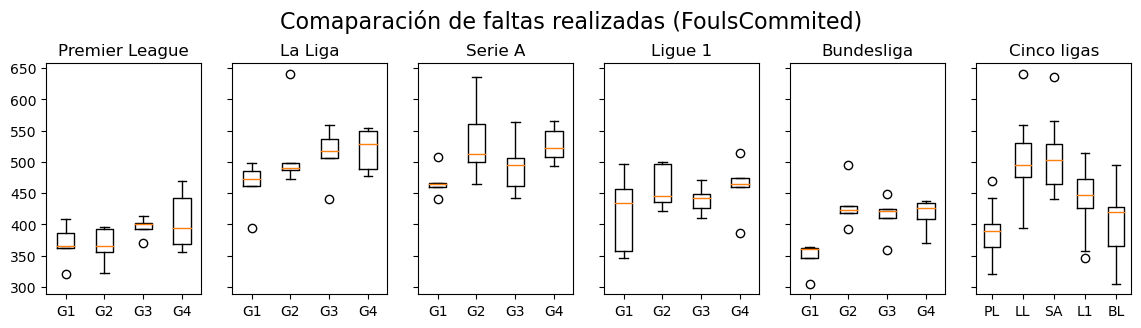

In [76]:
a = "Group"
b = "FoulsCommited"
L_PL = generador_de_tablas_grupos_premier(a, b)
L_LL = generador_de_tablas_grupos_laliga(a, b)
L_SA = generador_de_tablas_grupos_seriea(a, b)
L_L1 = generador_de_tablas_grupos_ligue1(a, b)
L_BL = generador_de_tablas_grupos_bundesliga(a, b)

titulo = 'Comaparación de faltas realizadas (FoulsCommited)'
variable = "FoulsCommited"
crear_boxplot_grupos(titulo, variable, L_PL, L_LL, L_SA, L_L1, L_BL)

### <center>Test de Shapiro-Wilk</center>

In [77]:
columna_concreta = pd.concat([data_PremierLeague_2122["FoulsCommited"], data_LaLiga_2122["FoulsCommited"], data_SerieA_2122["FoulsCommited"], data_Ligue1_2122["FoulsCommited"], data_Bundesliga_2122["FoulsCommited"]])

In [78]:
shapiro_test = stats.shapiro(columna_concreta)
shapiro_test

ShapiroResult(statistic=0.9852800369262695, pvalue=0.3464883267879486)

#### Entre los grupos de la Premier League:

In [79]:
# Creación de los 4 vectores nuevos
group1 = []
group2 = []
group3 = []
group4 = []

# Iteración sobre las mediciones y categorías correspondientes
for i in range(len(data_PremierLeague_2122["FoulsCommited"])):
    if data_PremierLeague_2122["Group"][i] == '1':
        group1.append(data_PremierLeague_2122["FoulsCommited"][i])
    elif data_PremierLeague_2122["Group"][i] == '2':
        group2.append(data_PremierLeague_2122["FoulsCommited"][i])
    elif data_PremierLeague_2122["Group"][i] == '3':
        group3.append(data_PremierLeague_2122["FoulsCommited"][i])
    elif data_PremierLeague_2122["Group"][i] == '4':
        group4.append(data_PremierLeague_2122["FoulsCommited"][i])

### <center>Test de Kruskal-Wallis
* La hipótesis nula (H0): La media de los cuatro grupos es igual.

* La hipótesis alternativa: (Ha): Almenos un grupo es diferente del resto.

In [80]:
kruskal(group1, group2, group3, group4)

KruskalResult(statistic=4.411888638073746, pvalue=0.22028556282205158)

#### Entre los grupos de la La Liga:

In [81]:
# Creación de los 4 vectores nuevos
group1 = []
group2 = []
group3 = []
group4 = []

# Iteración sobre las mediciones y categorías correspondientes
for i in range(len(data_LaLiga_2122["FoulsCommited"])):
    if data_LaLiga_2122["Group"][i] == '1':
        group1.append(data_LaLiga_2122["FoulsCommited"][i])
    elif data_LaLiga_2122["Group"][i] == '2':
        group2.append(data_LaLiga_2122["FoulsCommited"][i])
    elif data_LaLiga_2122["Group"][i] == '3':
        group3.append(data_LaLiga_2122["FoulsCommited"][i])
    elif data_LaLiga_2122["Group"][i] == '4':
        group4.append(data_LaLiga_2122["FoulsCommited"][i])

### <center>Test de Kruskal-Wallis
* La hipótesis nula (H0): La media de los cuatro grupos es igual.

* La hipótesis alternativa: (Ha): Almenos un grupo es diferente del resto.

In [82]:
kruskal(group1, group2, group3, group4)

KruskalResult(statistic=5.079999999999998, pvalue=0.16603200838513346)

#### Entre los grupos de la Serie A:

In [83]:
# Creación de los 4 vectores nuevos
group1 = []
group2 = []
group3 = []
group4 = []

# Iteración sobre las mediciones y categorías correspondientes
for i in range(len(data_SerieA_2122["FoulsCommited"])):
    if data_SerieA_2122["Group"][i] == '1':
        group1.append(data_SerieA_2122["FoulsCommited"][i])
    elif data_SerieA_2122["Group"][i] == '2':
        group2.append(data_SerieA_2122["FoulsCommited"][i])
    elif data_SerieA_2122["Group"][i] == '3':
        group3.append(data_SerieA_2122["FoulsCommited"][i])
    elif data_SerieA_2122["Group"][i] == '4':
        group4.append(data_SerieA_2122["FoulsCommited"][i])

### <center>Test de Kruskal-Wallis
* La hipótesis nula (H0): La media de los cuatro grupos es igual.

* La hipótesis alternativa: (Ha): Almenos un grupo es diferente del resto.

In [84]:
kruskal(group1, group2, group3, group4)

KruskalResult(statistic=6.333333333333327, pvalue=0.09647232237962843)

#### Entre los grupos de la Ligue 1:

In [85]:
# Creación de los 4 vectores nuevos
group1 = []
group2 = []
group3 = []
group4 = []

# Iteración sobre las mediciones y categorías correspondientes
for i in range(len(data_Ligue1_2122["FoulsCommited"])):
    if data_Ligue1_2122["Group"][i] == '1':
        group1.append(data_Ligue1_2122["FoulsCommited"][i])
    elif data_Ligue1_2122["Group"][i] == '2':
        group2.append(data_Ligue1_2122["FoulsCommited"][i])
    elif data_Ligue1_2122["Group"][i] == '3':
        group3.append(data_Ligue1_2122["FoulsCommited"][i])
    elif data_Ligue1_2122["Group"][i] == '4':
        group4.append(data_Ligue1_2122["FoulsCommited"][i])

### <center>Test de Kruskal-Wallis
* La hipótesis nula (H0): La media de los cuatro grupos es igual.

* La hipótesis alternativa: (Ha): Almenos un grupo es diferente del resto.

In [86]:
kruskal(group1, group2, group3, group4)

KruskalResult(statistic=2.7257142857142895, pvalue=0.43587509351293774)

#### Entre los grupos de la Bundesliga:

In [87]:
# Creación de los 4 vectores nuevos
group1 = []
group2 = []
group3 = []
group4 = []

# Iteración sobre las mediciones y categorías correspondientes
for i in range(len(data_Bundesliga_2122["FoulsCommited"])):
    if data_Bundesliga_2122["Group"][i] == '1':
        group1.append(data_Bundesliga_2122["FoulsCommited"][i])
    elif data_Bundesliga_2122["Group"][i] == '2':
        group2.append(data_Bundesliga_2122["FoulsCommited"][i])
    elif data_Bundesliga_2122["Group"][i] == '3':
        group3.append(data_Bundesliga_2122["FoulsCommited"][i])
    elif data_Bundesliga_2122["Group"][i] == '4':
        group4.append(data_Bundesliga_2122["FoulsCommited"][i])

### <center>Test de Kruskal-Wallis
* La hipótesis nula (H0): La media de los cuatro grupos es igual.

* La hipótesis alternativa: (Ha): Almenos un grupo es diferente del resto.

In [88]:
kruskal(group1, group2, group3, group4)

KruskalResult(statistic=7.375438596491222, pvalue=0.06084684161893924)

#### Entre las 4 ligas que tienen la misma cantidad de equipos:

### <center>Test de Kruskal-Wallis
* La hipótesis nula (H0): La media de los cuatro grupos es igual.

* La hipótesis alternativa: (Ha): Almenos un grupo es diferente del resto.

In [89]:
kruskal(data_PremierLeague_2122["FoulsCommited"], data_LaLiga_2122["FoulsCommited"], data_SerieA_2122["FoulsCommited"], data_Ligue1_2122["FoulsCommited"])

KruskalResult(statistic=45.43053286134583, pvalue=7.494821763858425e-10)

### <center>Prueba de Tukey

In [90]:
# Juntar los datos en una sola lista
data = list(data_PremierLeague_2122["FoulsCommited"]) + list(data_LaLiga_2122["FoulsCommited"]) + list(data_SerieA_2122["FoulsCommited"]) + list(data_Ligue1_2122["FoulsCommited"]) + list(data_Bundesliga_2122["FoulsCommited"])

# Crear una lista de etiquetas para los grupos
labels = ['Premier League'] * len(data_PremierLeague_2122["FoulsCommited"]) + ['La Liga'] * len(data_LaLiga_2122["FoulsCommited"]) + ['Serie A'] * len(data_SerieA_2122["FoulsCommited"]) + ['Ligue 1'] * len(data_Ligue1_2122["FoulsCommited"]) + ['Bundesliga'] * len(data_Bundesliga_2122["FoulsCommited"])

# Crear un dataframe con los datos y las etiquetas
df = pd.DataFrame({'data': data, 'labels': labels})

# Realizar el test de Tukey
tukey_results = mc.pairwise_tukeyhsd(df['data'], df['labels'])

# Imprimir los resultados
print(tukey_results)


          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1         group2     meandiff p-adj    lower    upper   reject
-----------------------------------------------------------------------
    Bundesliga        La Liga  98.8833    0.0   57.8346 139.9321   True
    Bundesliga        Ligue 1  40.3333 0.0566   -0.7154  81.3821  False
    Bundesliga Premier League -19.8167 0.6652  -60.8654  21.2321  False
    Bundesliga        Serie A 101.8833    0.0   60.8346 142.9321   True
       La Liga        Ligue 1   -58.55 0.0009  -98.5039 -18.5961   True
       La Liga Premier League   -118.7    0.0 -158.6539 -78.7461   True
       La Liga        Serie A      3.0 0.9996  -36.9539  42.9539  False
       Ligue 1 Premier League   -60.15 0.0006 -100.1039 -20.1961   True
       Ligue 1        Serie A    61.55 0.0004   21.5961 101.5039   True
Premier League        Serie A    121.7    0.0   81.7461 161.6539   True
----------------------------------------------------------------